#### Importing Libraries

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#### Top 5 most common emotions for each gender for each movie

age_of_ultron.csv


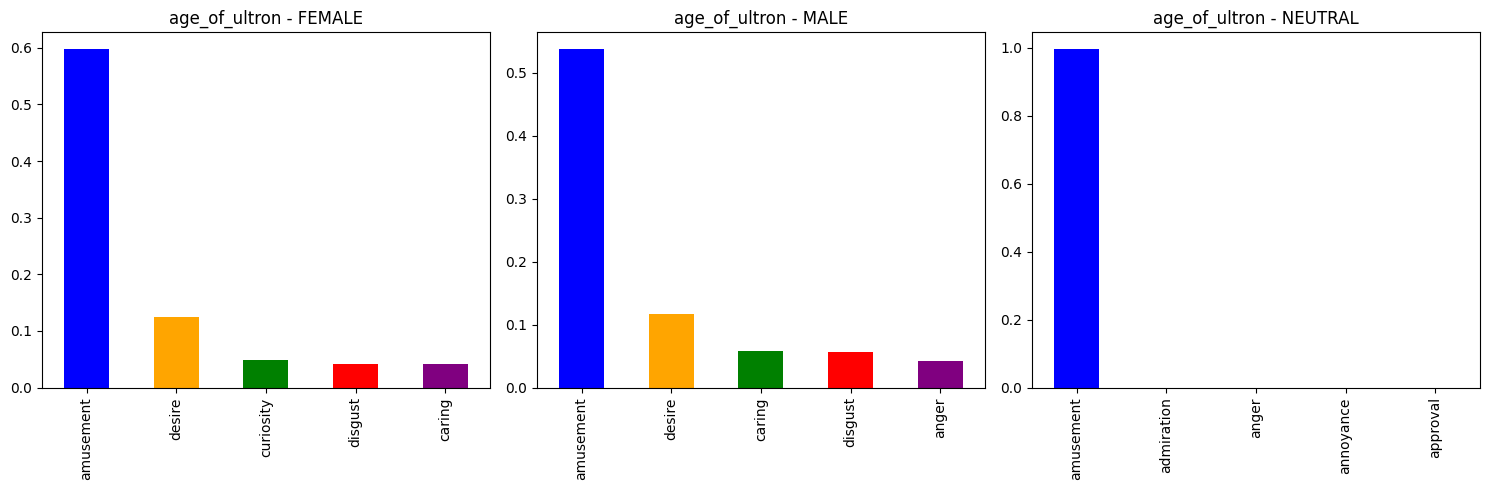

ant_man.csv


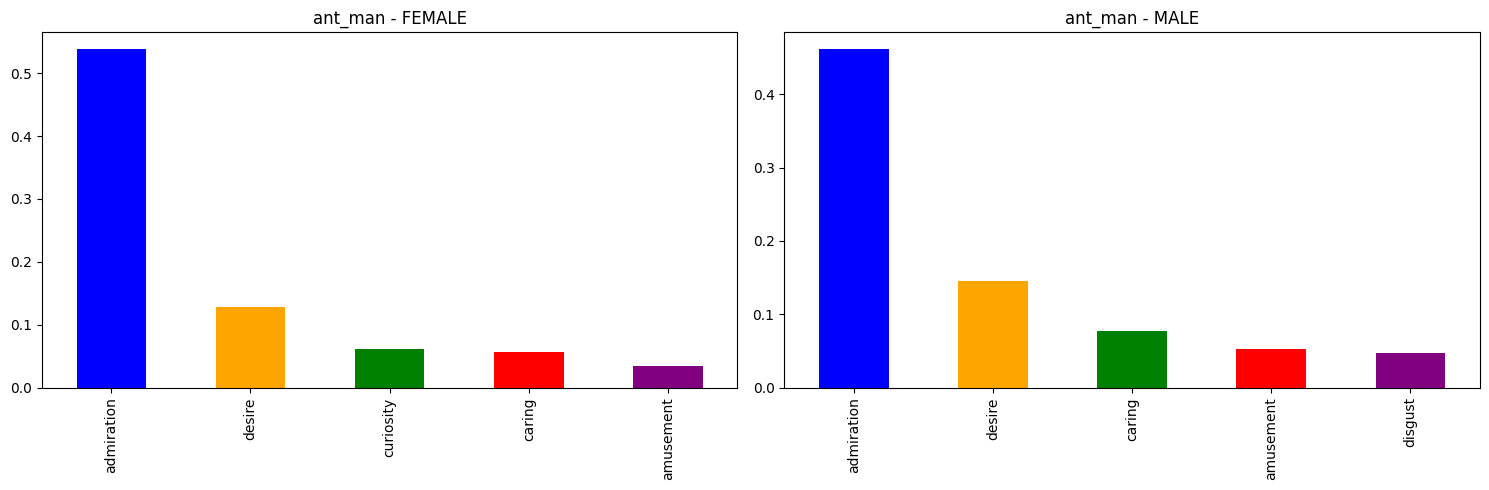

avengers.csv


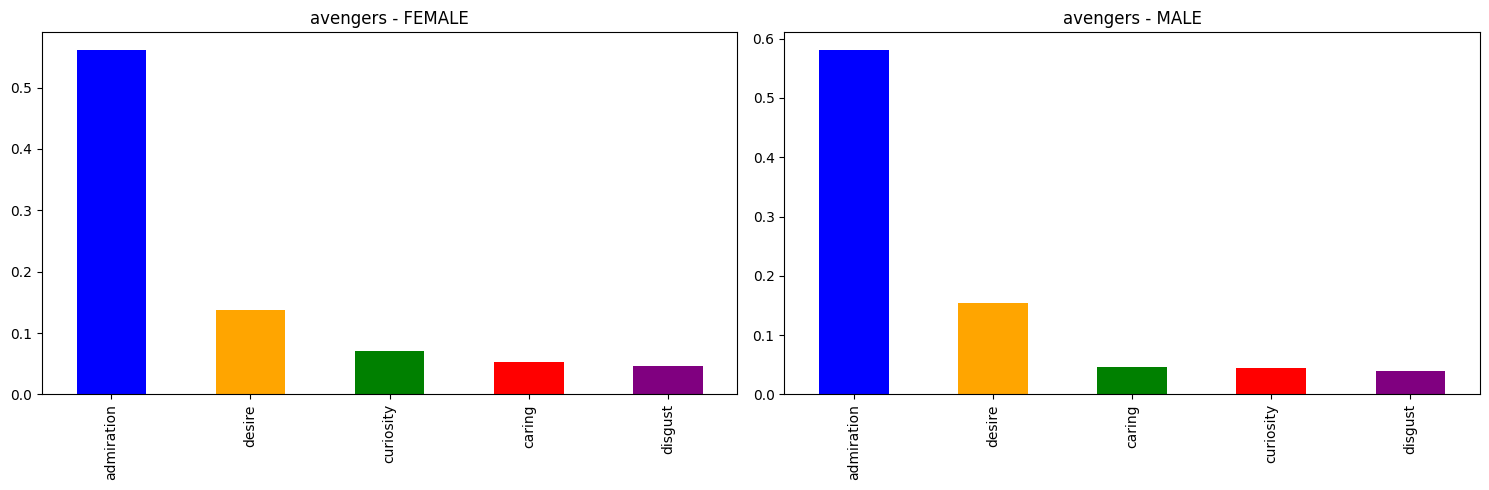

avengers_endgame.csv


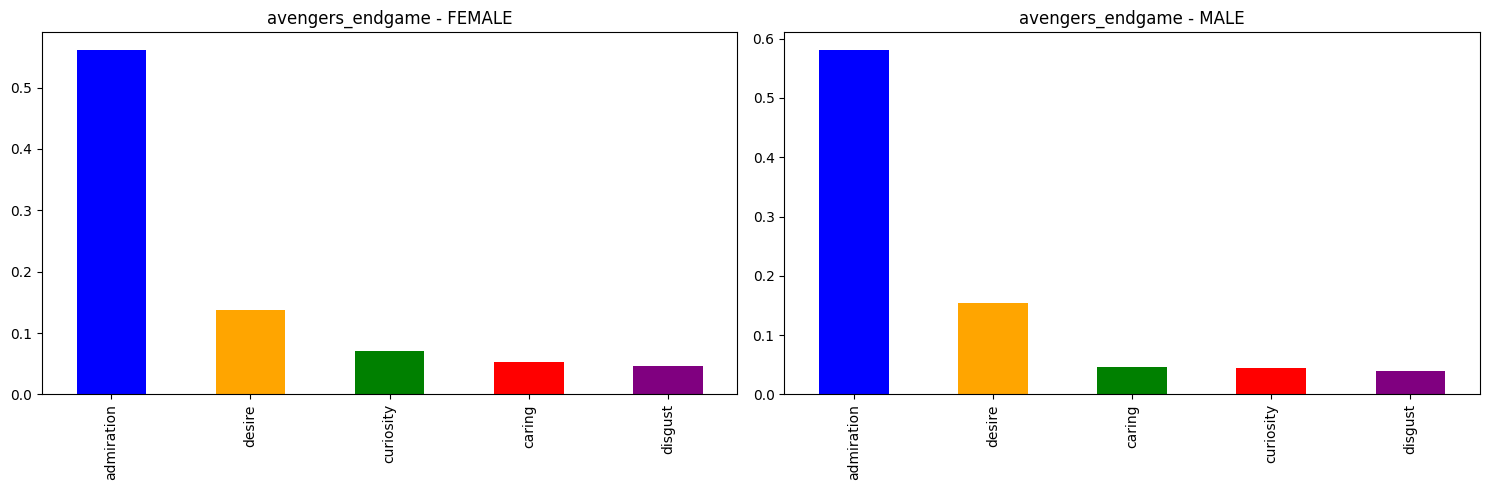

black_panther.csv


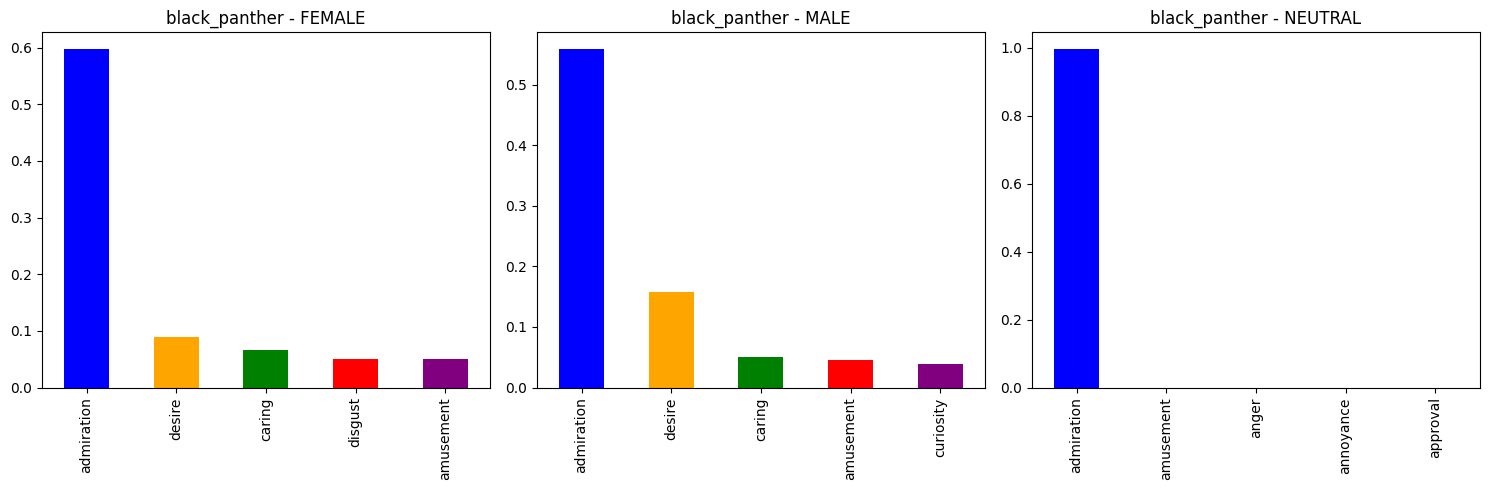

captain_america.csv


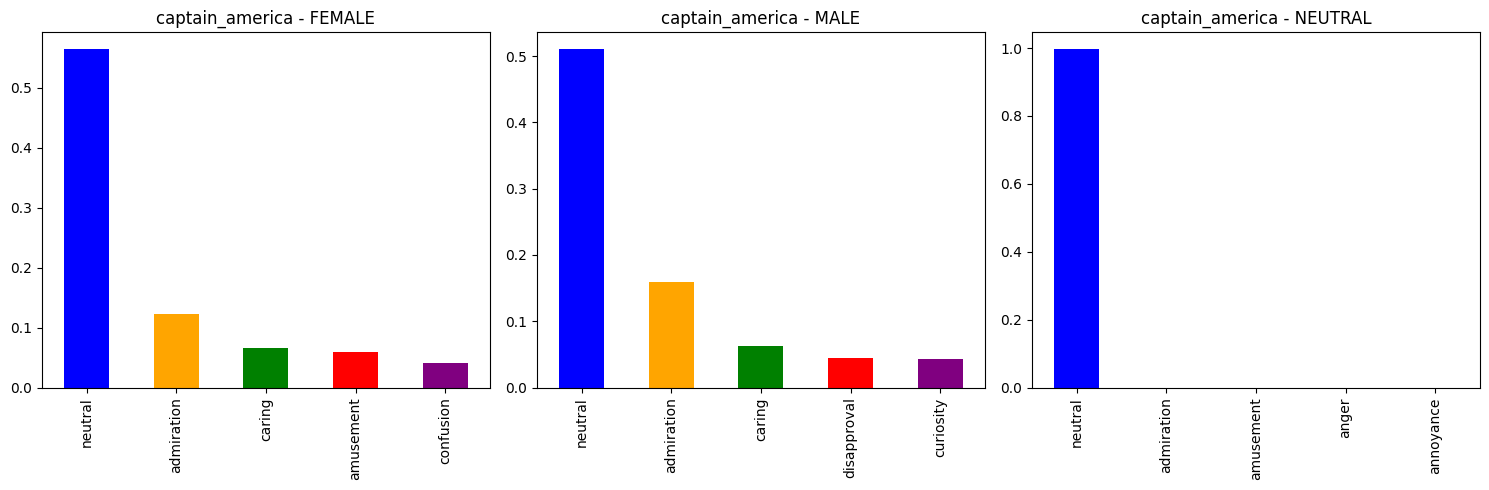

civil_war.csv


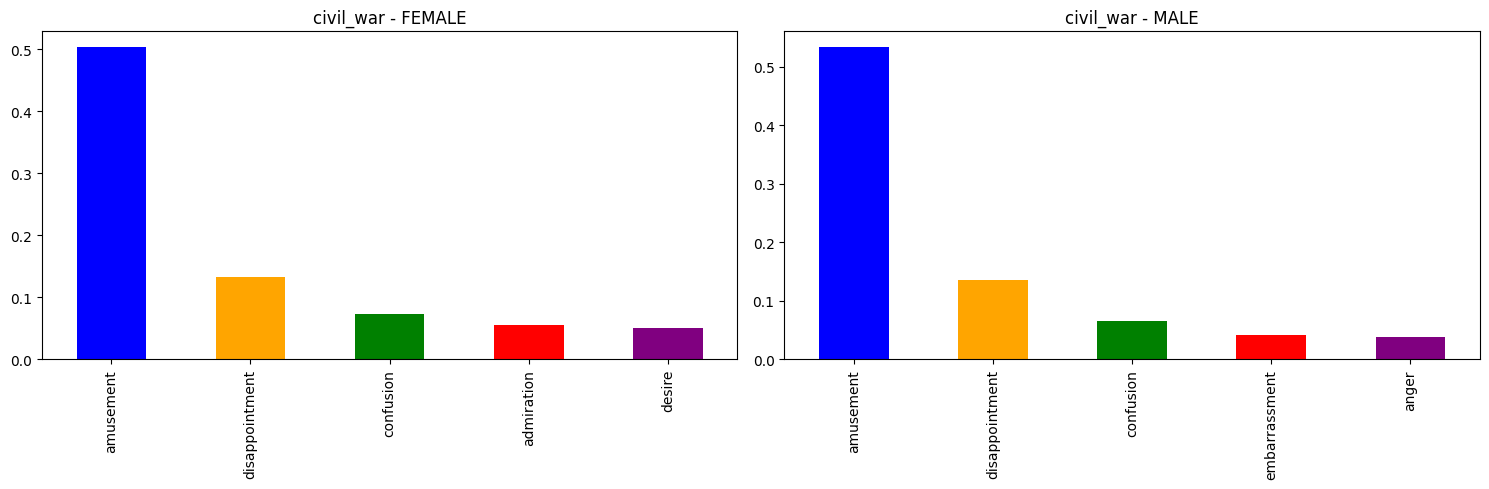

infinity_war.csv


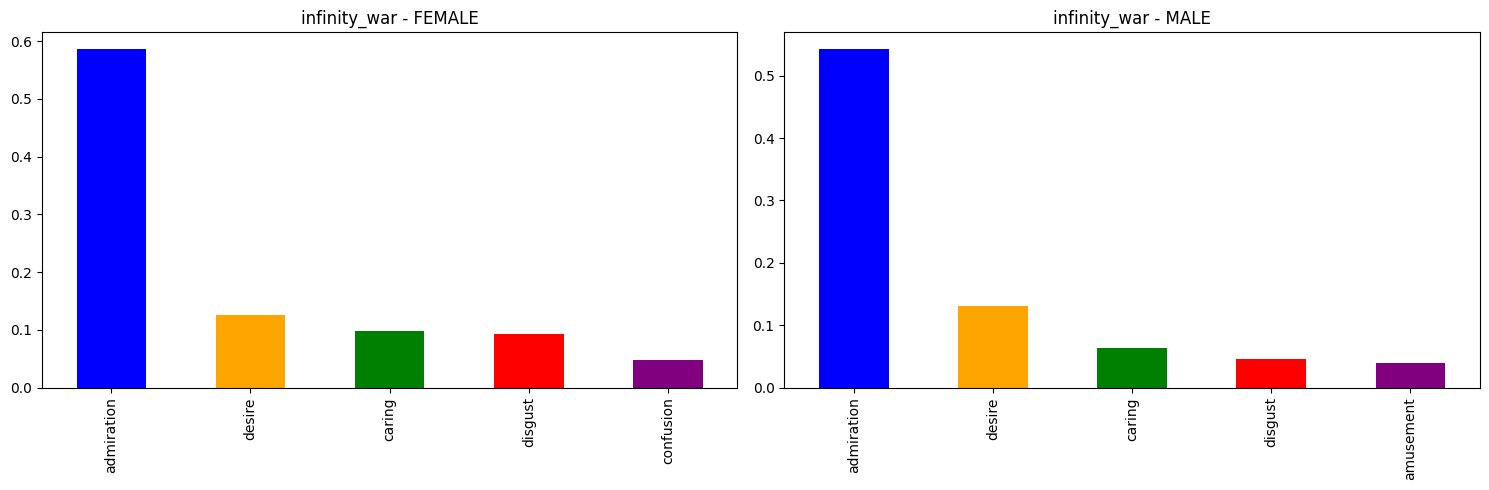

iron_man.csv


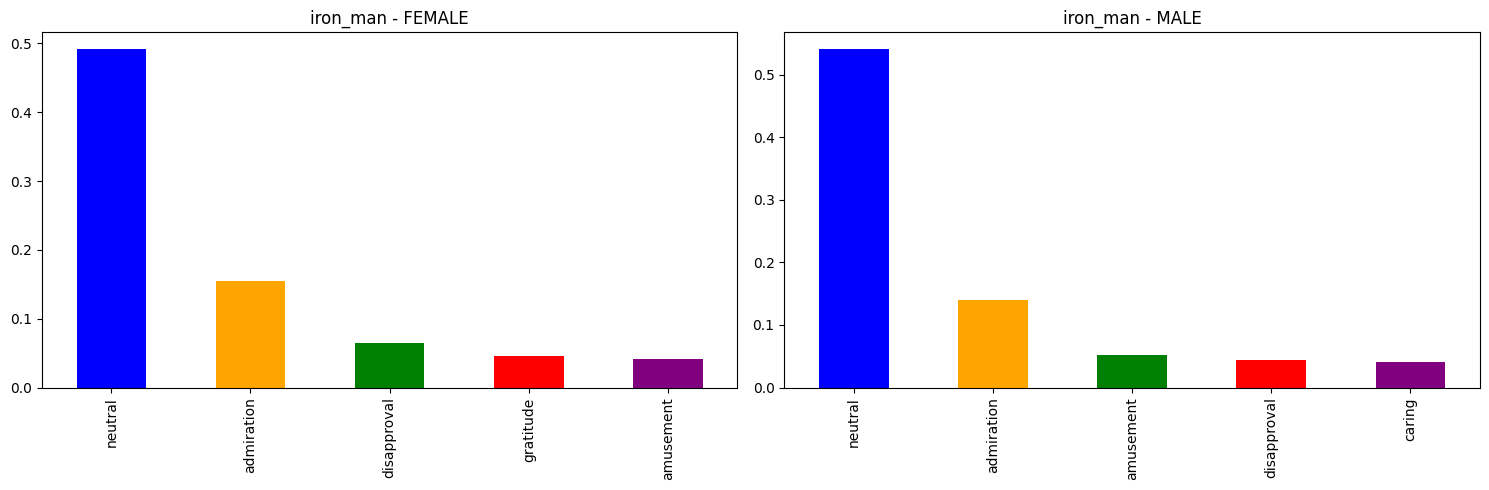

iron_man_2.csv


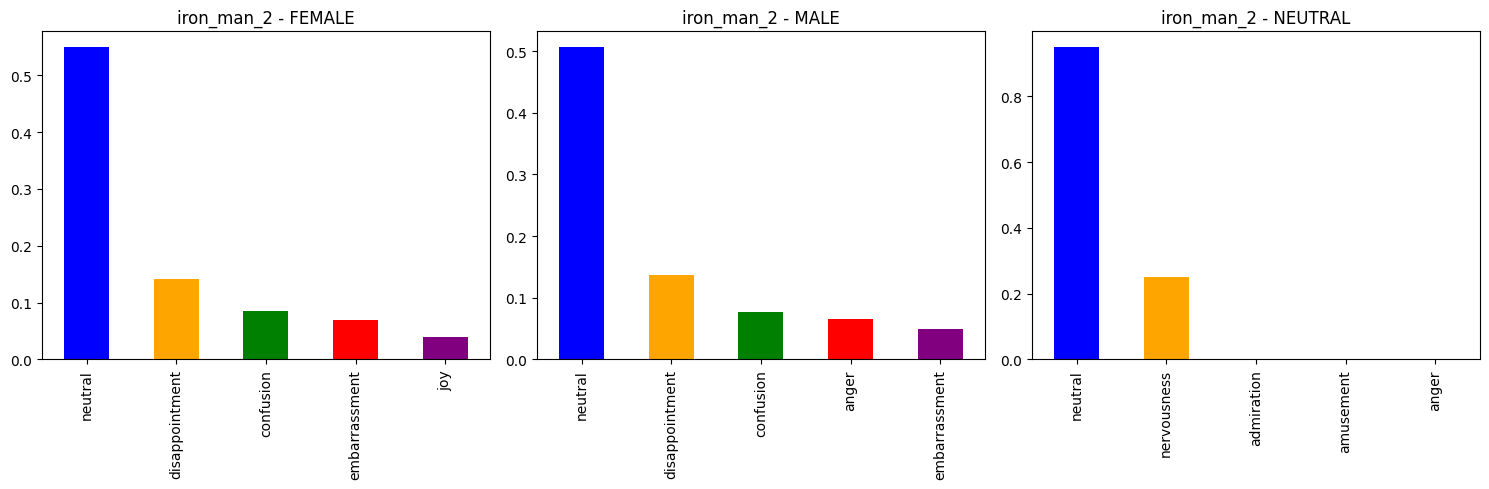

iron_man_3.csv


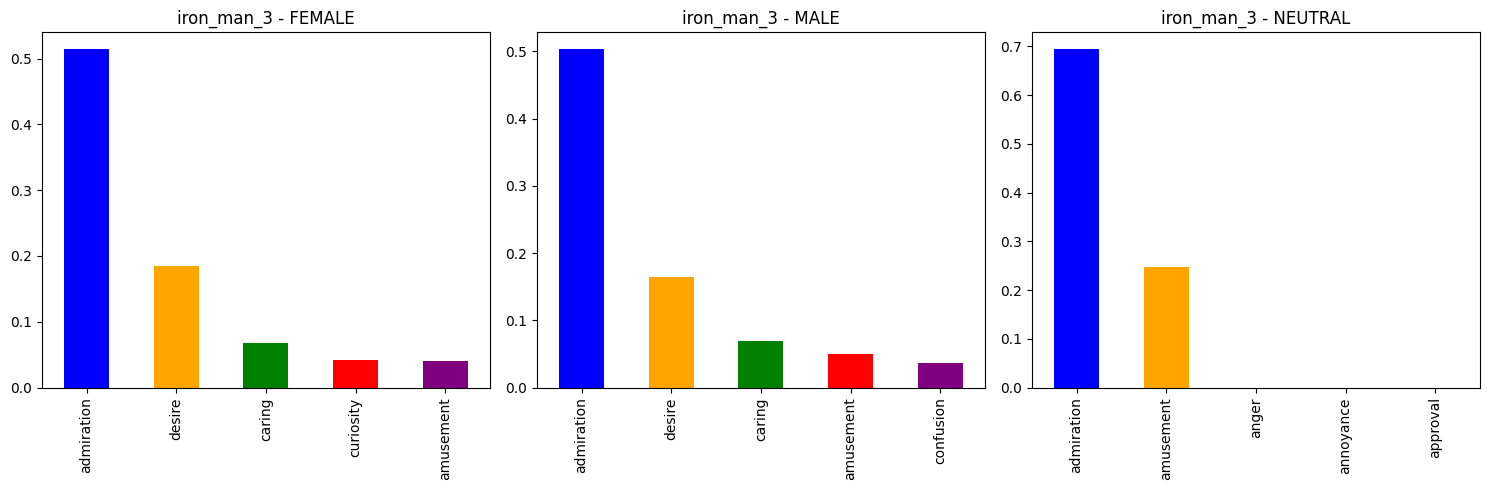

ragnarok.csv


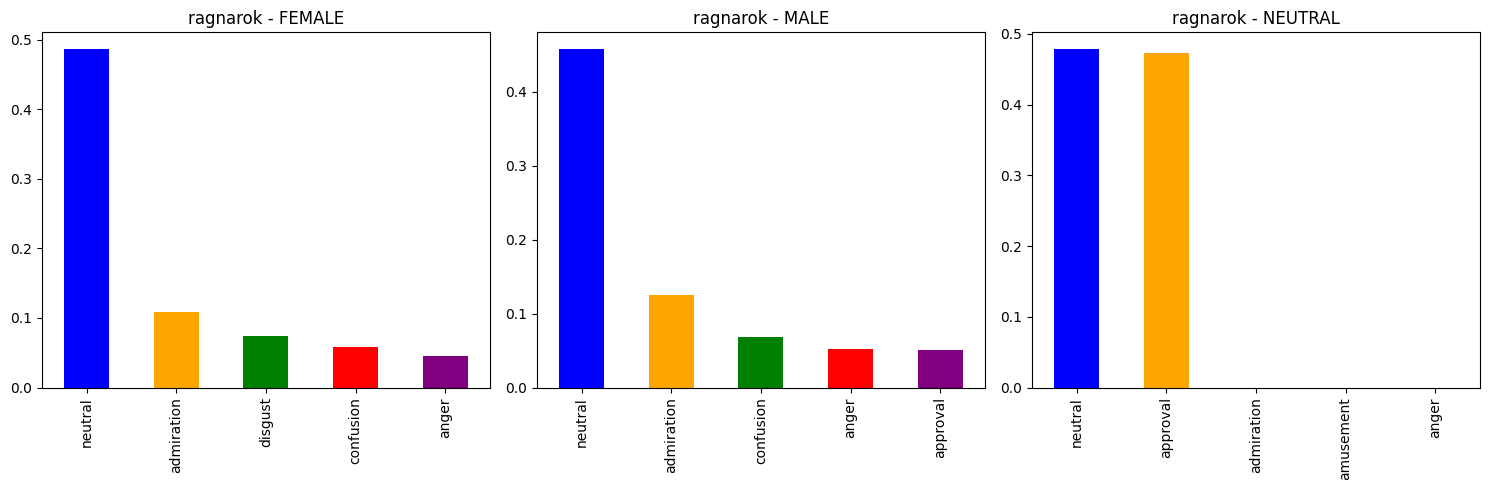

thor.csv


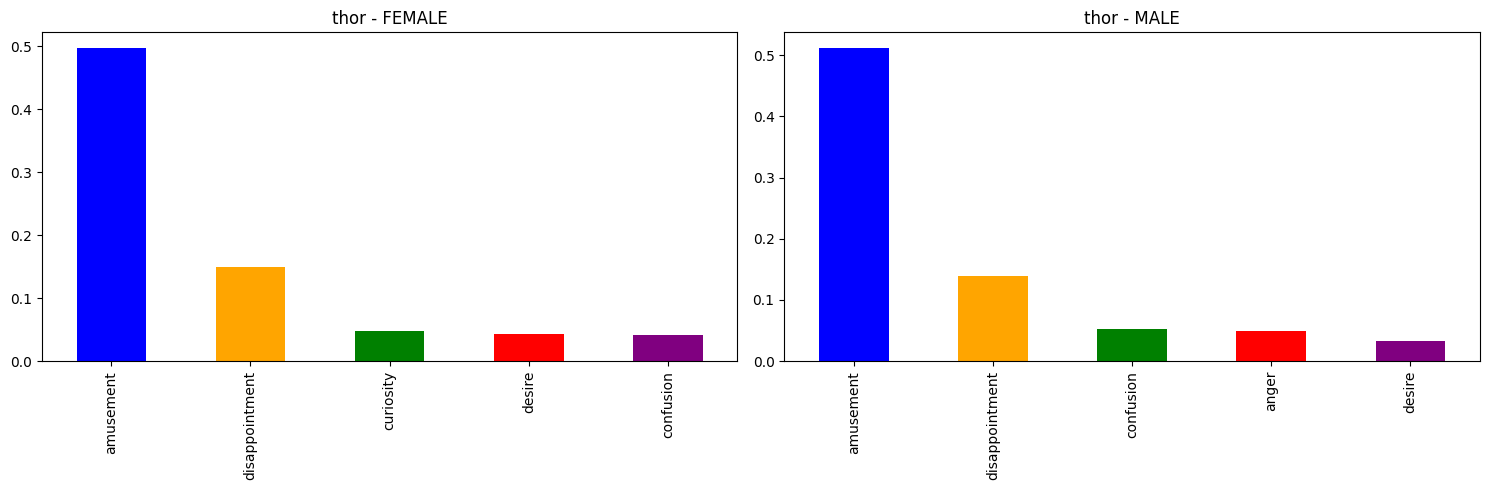

thor_dark_world.csv


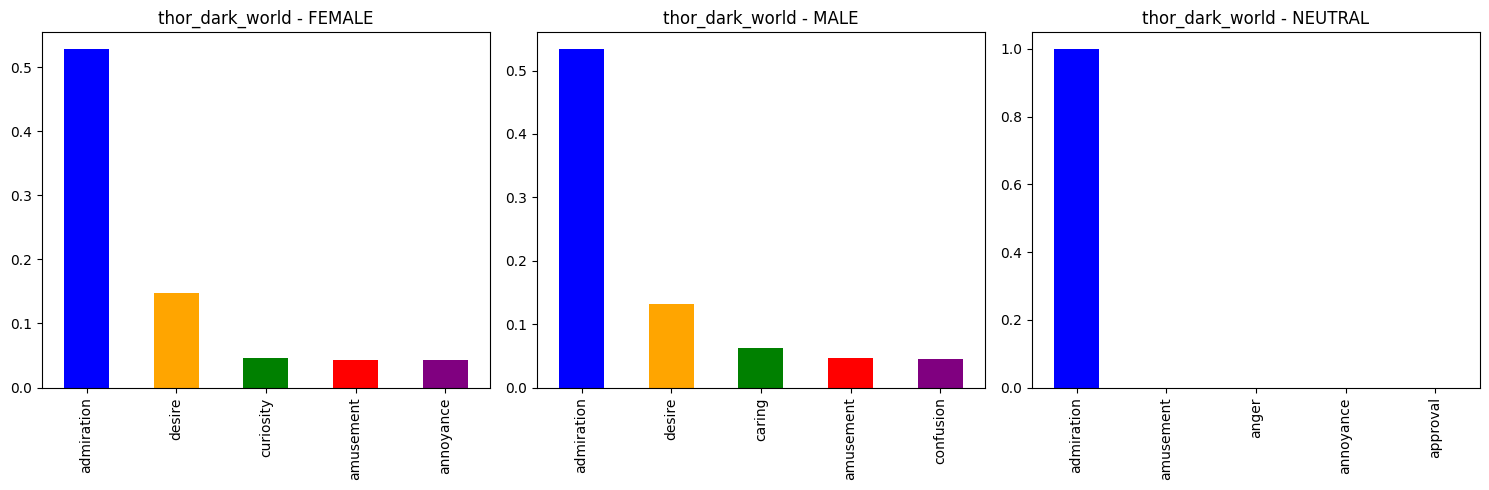

winter_soldier.csv


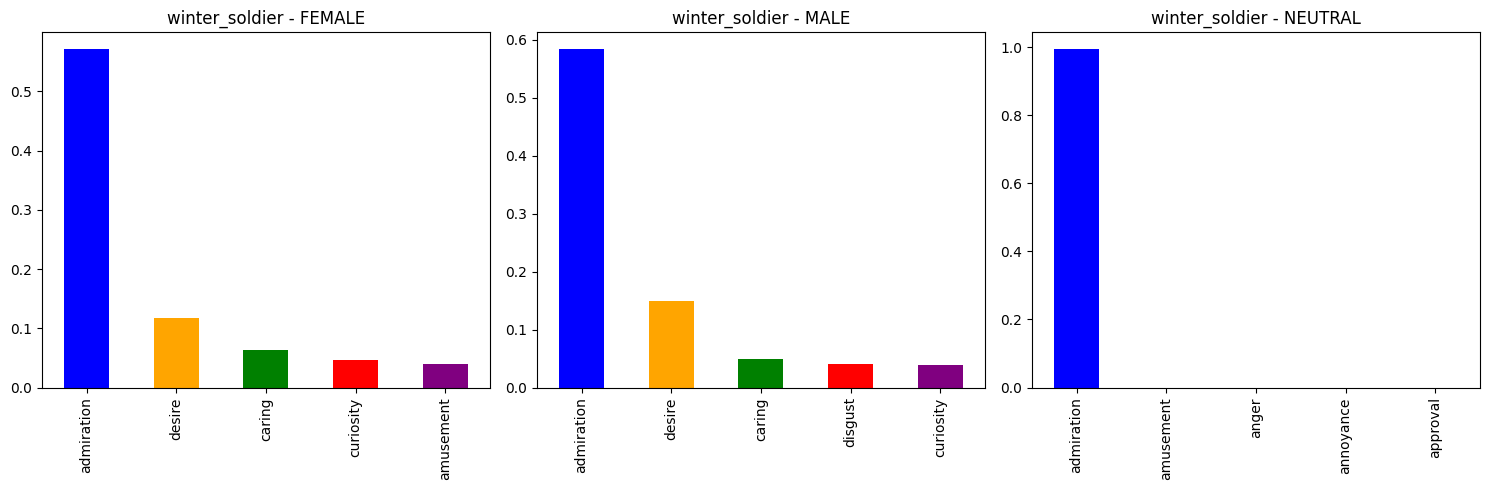

In [42]:
folder_path = './script_csv_go_emotion'
for i in os.listdir(folder_path):
    if i.endswith('.csv'):
        print(i)
        data = pd.read_csv(os.path.join(folder_path, i))
        # Drop the 'line' and 'character' columns
        data = data.drop(columns=['line', 'character'])
        # Group by 'gender' and calculate the mean for each group
        grouped_data = data.groupby('gender').agg('mean')
        grouped_data = grouped_data.drop(columns=['Unnamed: 0'])
        # Get the top 5 emotions for each gender
        top_emotions = grouped_data.apply(lambda x: x.nlargest(5).index, axis=1)
        # Create subplots
        fig, axes = plt.subplots(nrows=1, ncols=len(grouped_data.index), figsize=(15, 5))
        # Plot the top 5 emotions for each gender
        for ax, gender in zip(axes, grouped_data.index):
            grouped_data.loc[gender, top_emotions.loc[gender]].plot(kind='bar', ax=ax, title=f'{i[:-4]} - {gender}', color = ['blue', 'orange', 'green', 'red', 'purple'])
        plt.tight_layout()
        plt.show()

#### Top 5 Emotions for top 5 most frequently occuring characters for each movie

age_of_ultron.csv


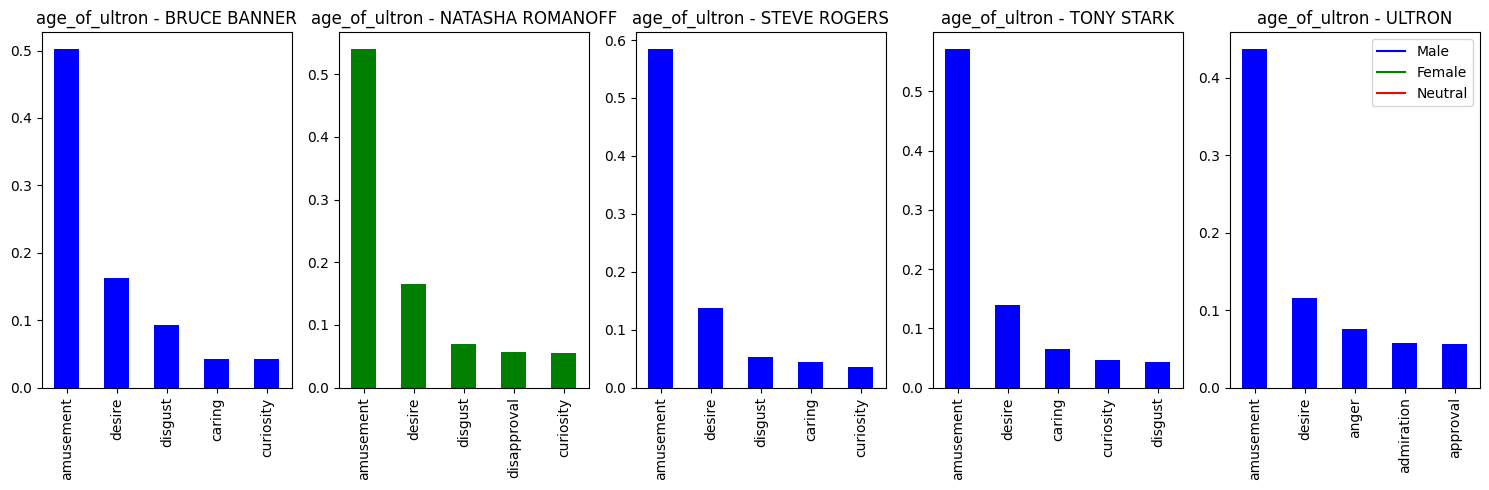

ant_man.csv


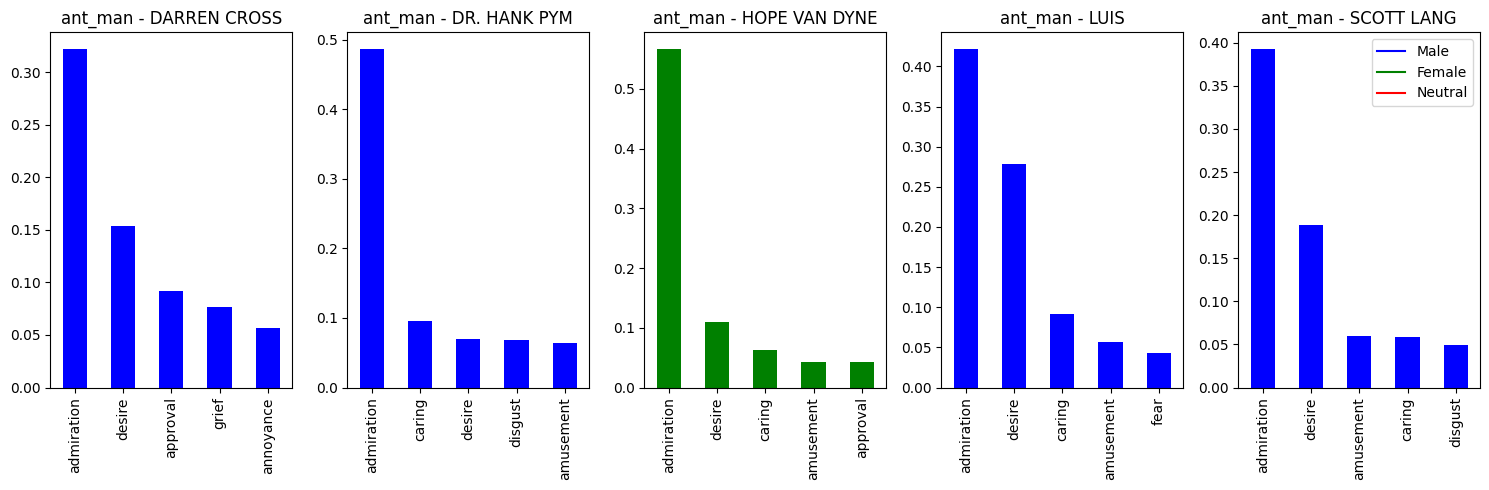

avengers.csv


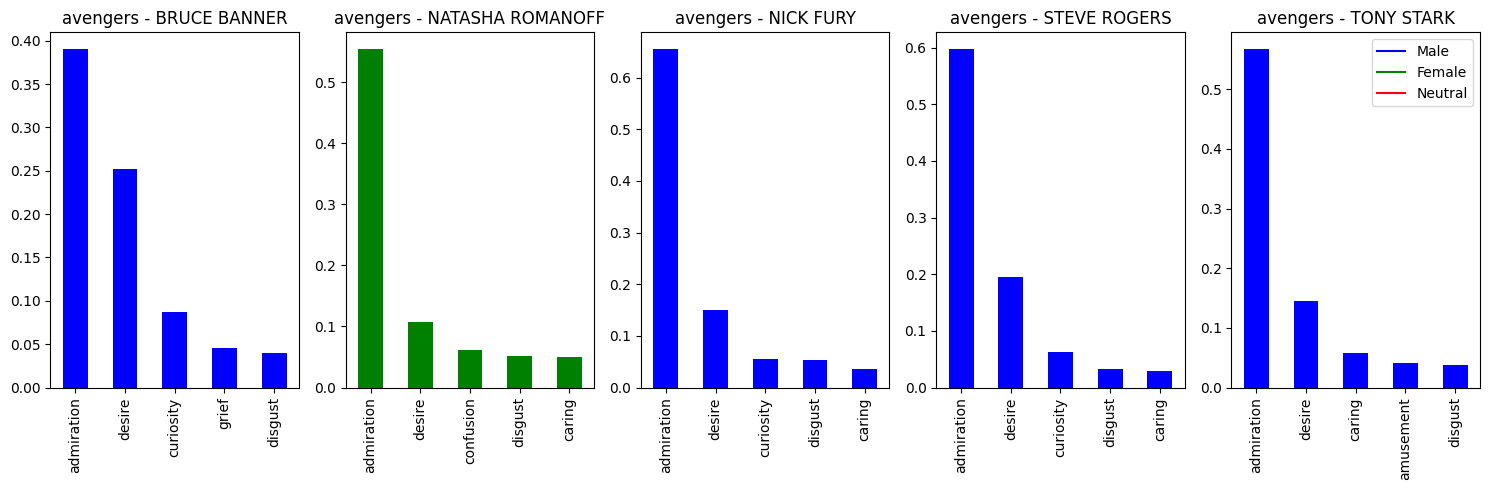

avengers_endgame.csv


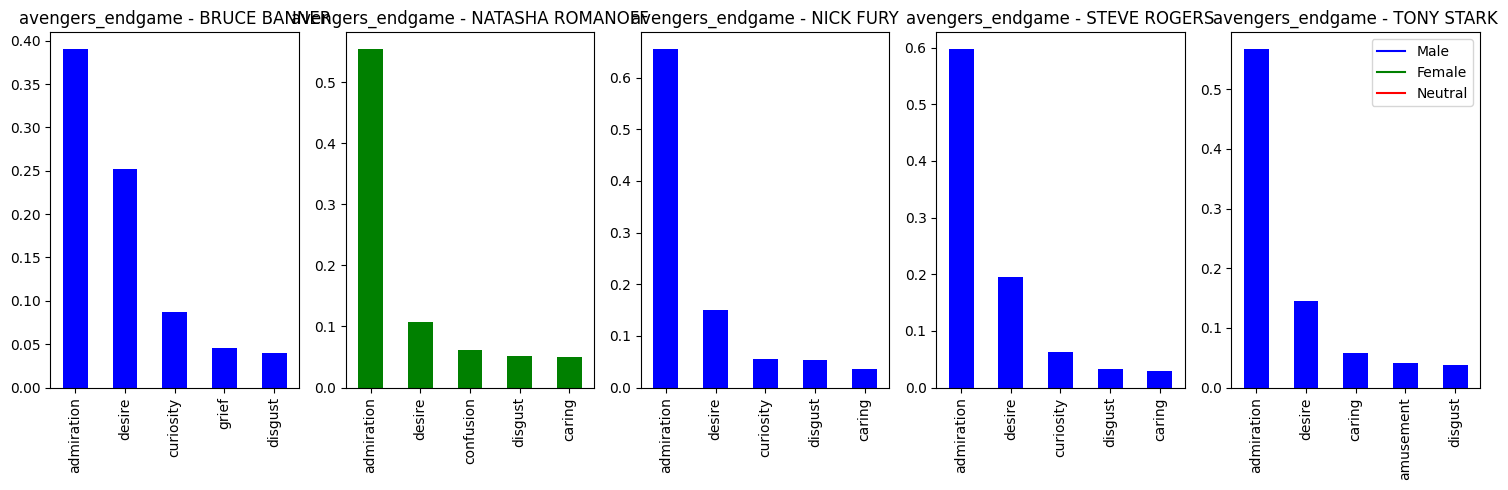

black_panther.csv


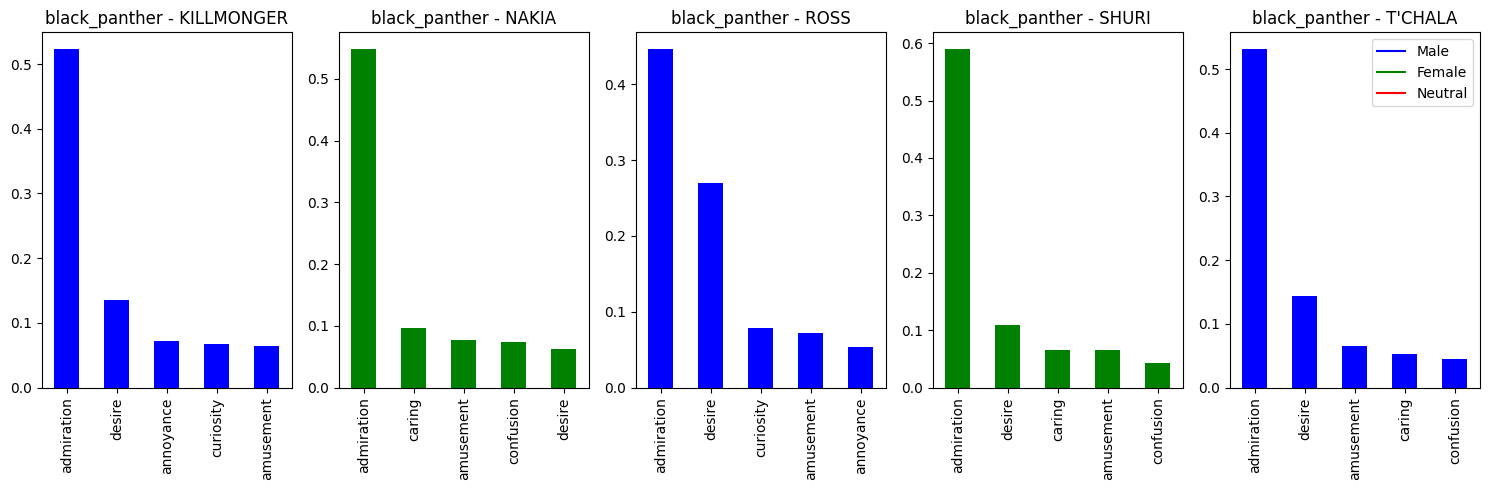

captain_america.csv


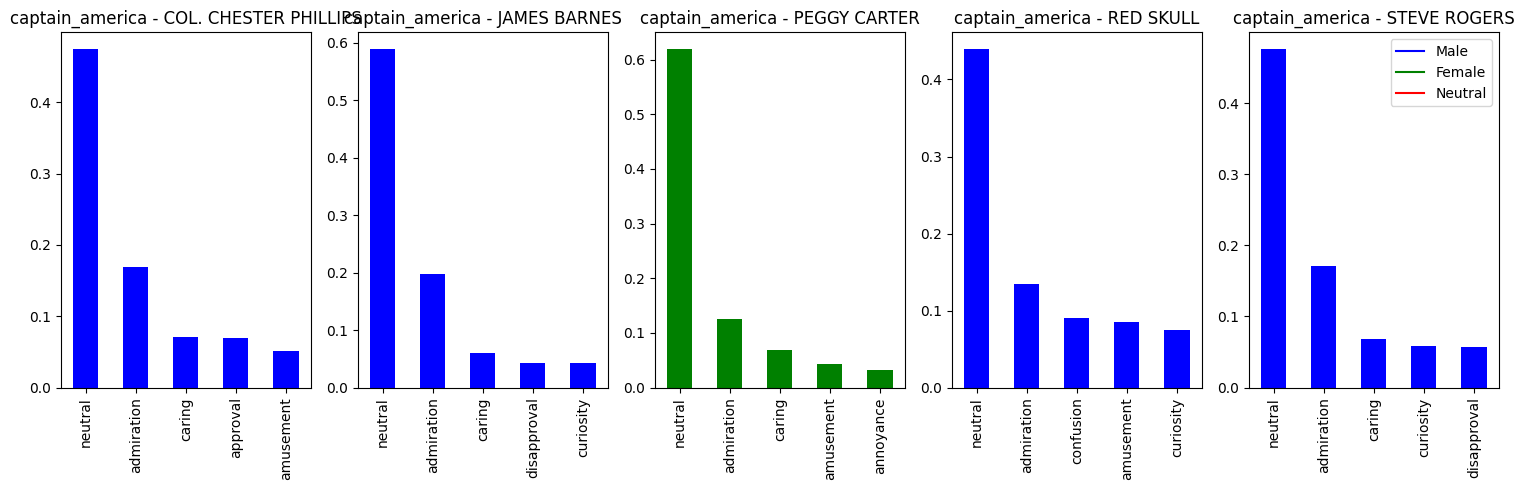

civil_war.csv


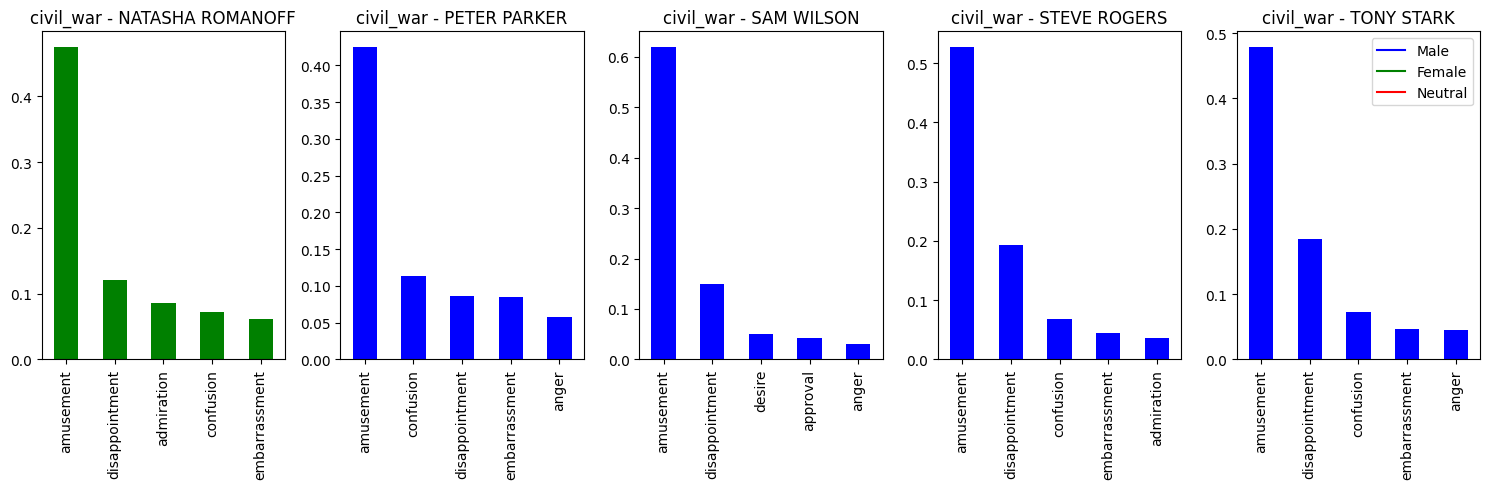

infinity_war.csv


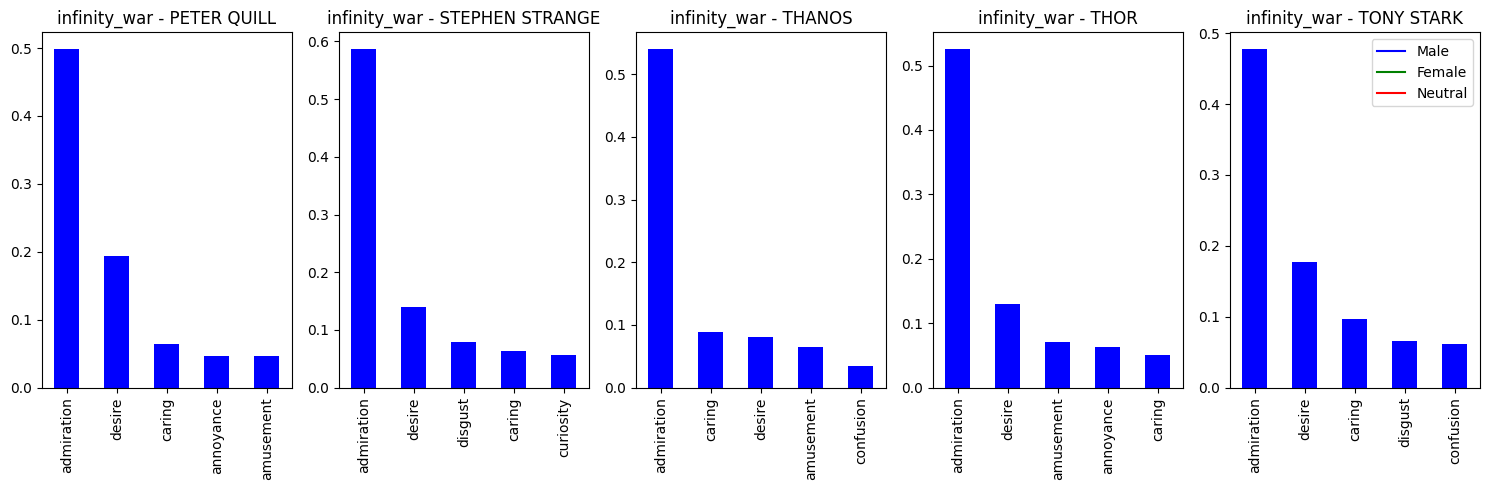

iron_man.csv


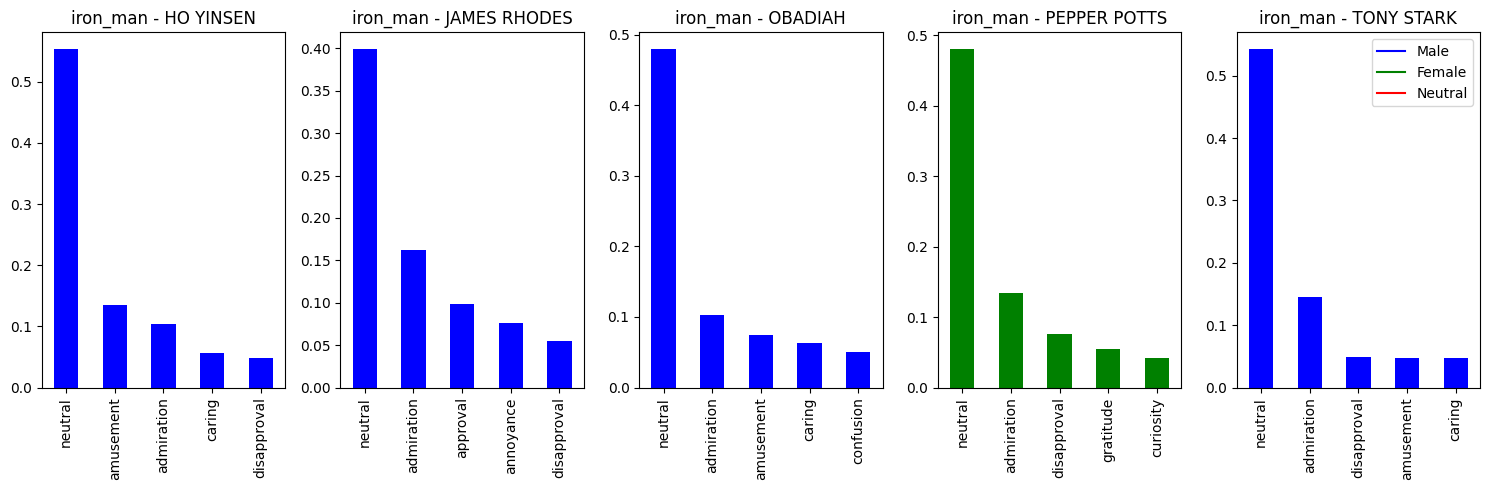

iron_man_2.csv


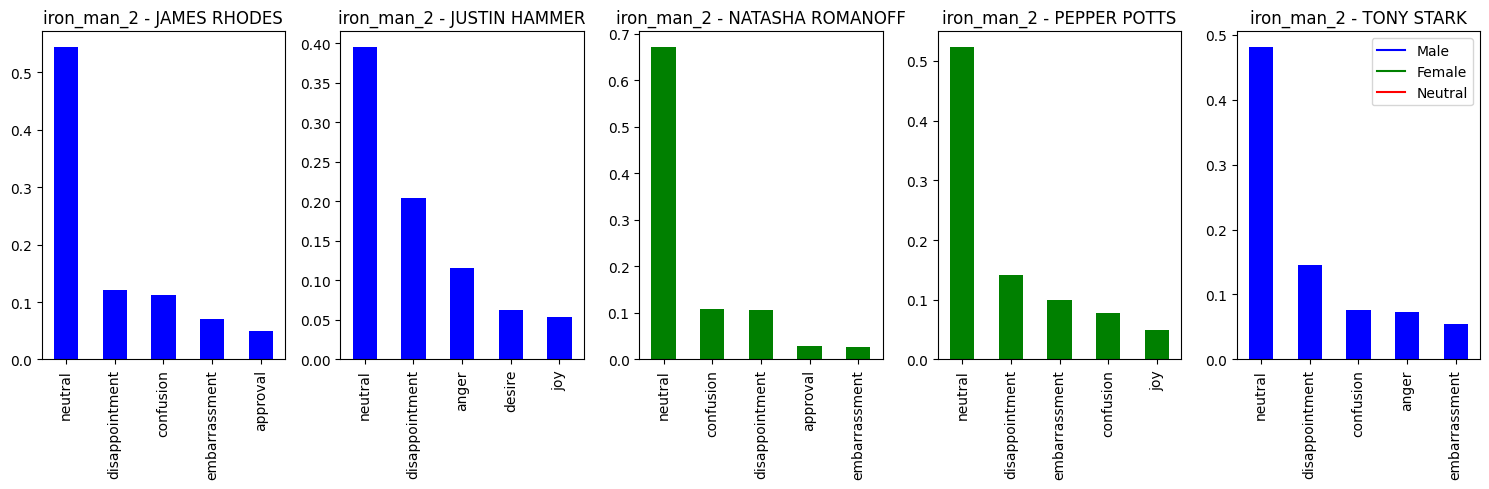

iron_man_3.csv


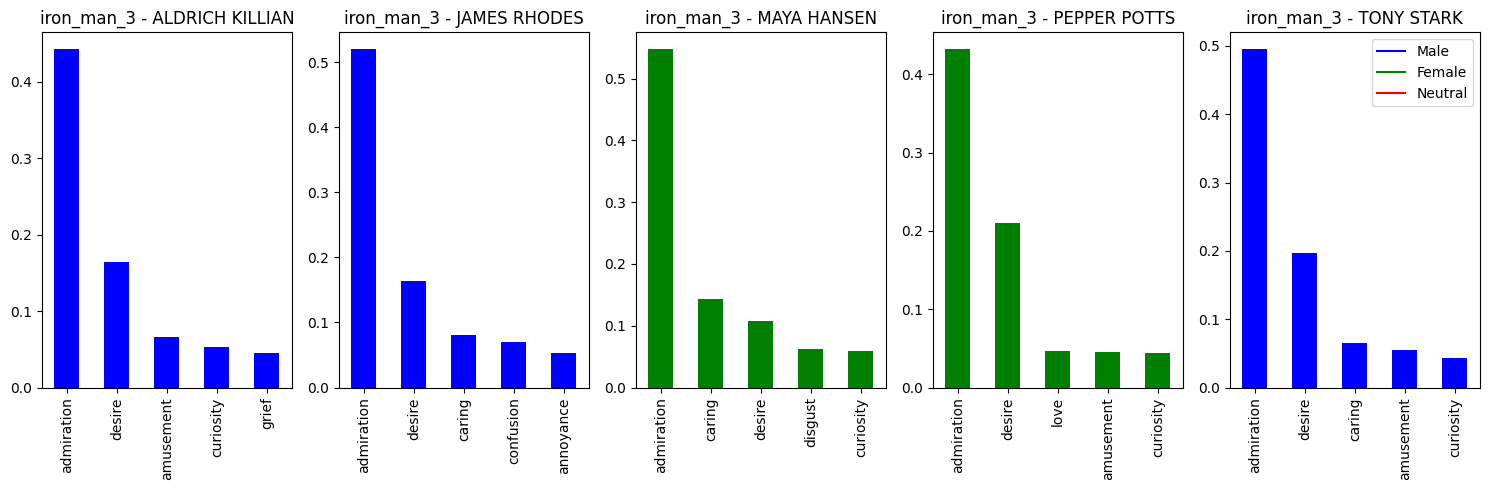

ragnarok.csv


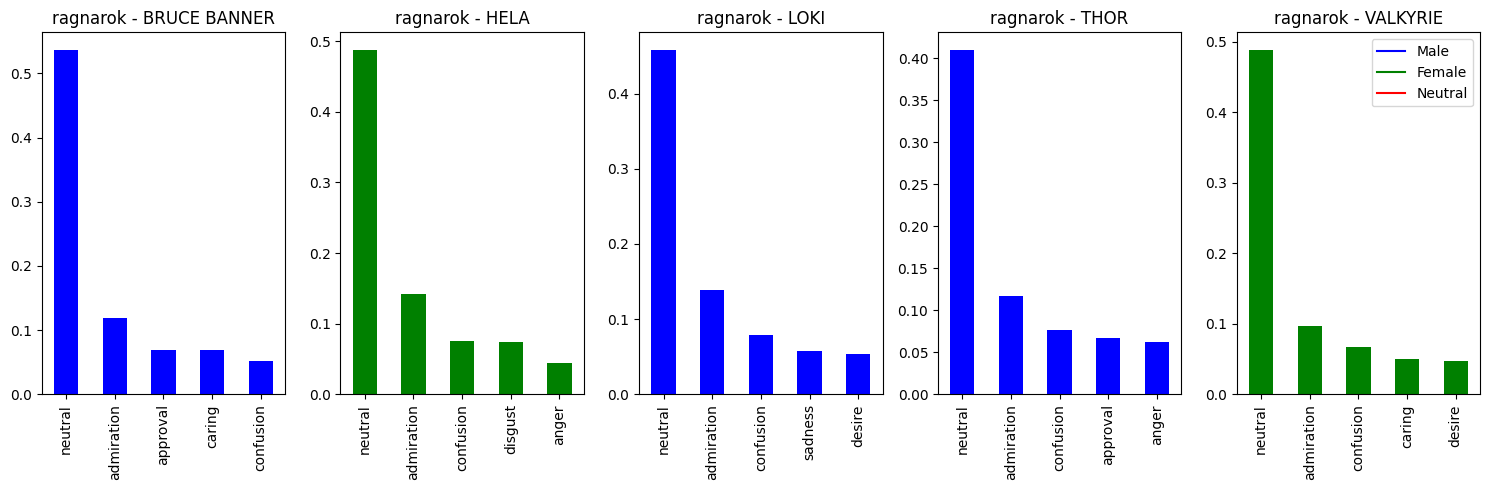

thor.csv


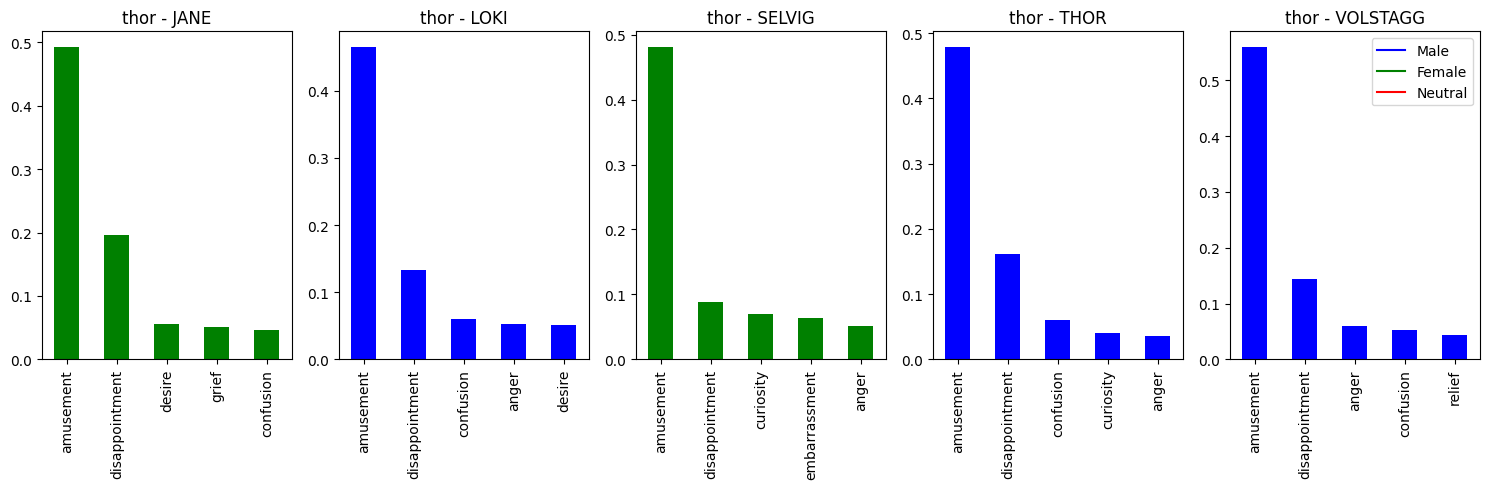

thor_dark_world.csv


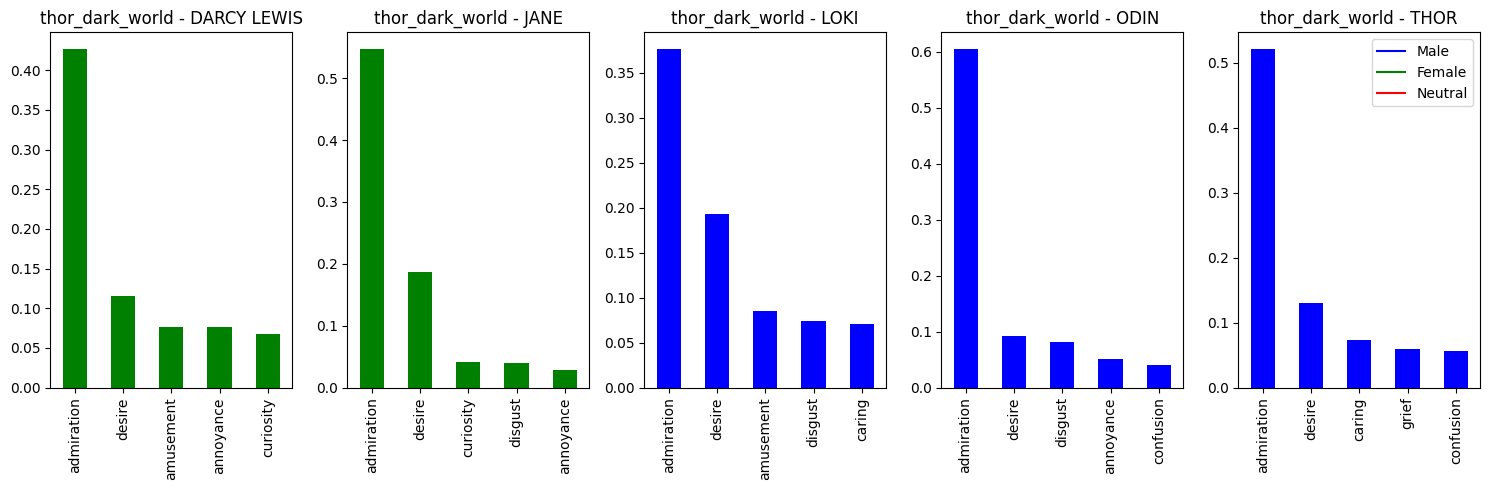

winter_soldier.csv


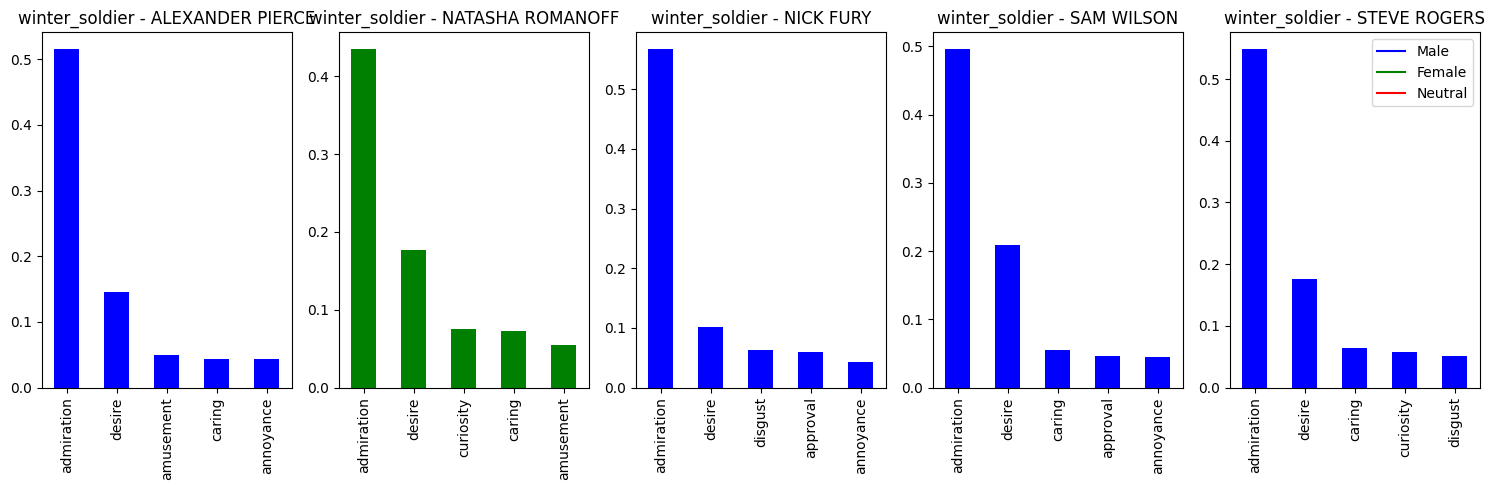

In [40]:
folder_path = './script_csv_go_emotion'
for i in os.listdir(folder_path):
    if i.endswith('.csv'):
        data = pd.read_csv(os.path.join(folder_path, i))
        # Select the top 5 most occurring characters
        top_characters = data['character'].value_counts().nlargest(5).index
        data = data[data['character'].isin(top_characters)]
        data = data.drop(columns=['line'])
        # Group by 'character' and 'gender' and calculate the mean for each group
        grouped_data = data.groupby(['character', 'gender']).agg('mean')
        grouped_data = grouped_data.drop(columns=['Unnamed: 0'])
        # Get the top 5 emotions for each character
        top_emotions = grouped_data.apply(lambda x: x.nlargest(5).index, axis=1)
        fig, axes = plt.subplots(nrows=1, ncols=len(grouped_data.index), figsize=(15, 5))
        colors = {'MALE': 'blue', 'FEMALE': 'green', 'NEUTRAL': 'red'}
        # Plot the top 5 emotions for each character
        for ax, (character, gender) in zip(axes, grouped_data.index):
            grouped_data.loc[(character, gender), top_emotions.loc[(character, gender)]].plot(kind='bar', ax=ax, title=f'{i[:-4]} - {character}', color=colors[gender])
        plt.tight_layout()
        plt.legend([plt.Line2D((0,0),(1,1), color=color) for color in colors.values()], ['Male', 'Female', 'Neutral'])
        plt.show()

#### Top 5 emotions for top 10 most frequently occuring characters among all movies

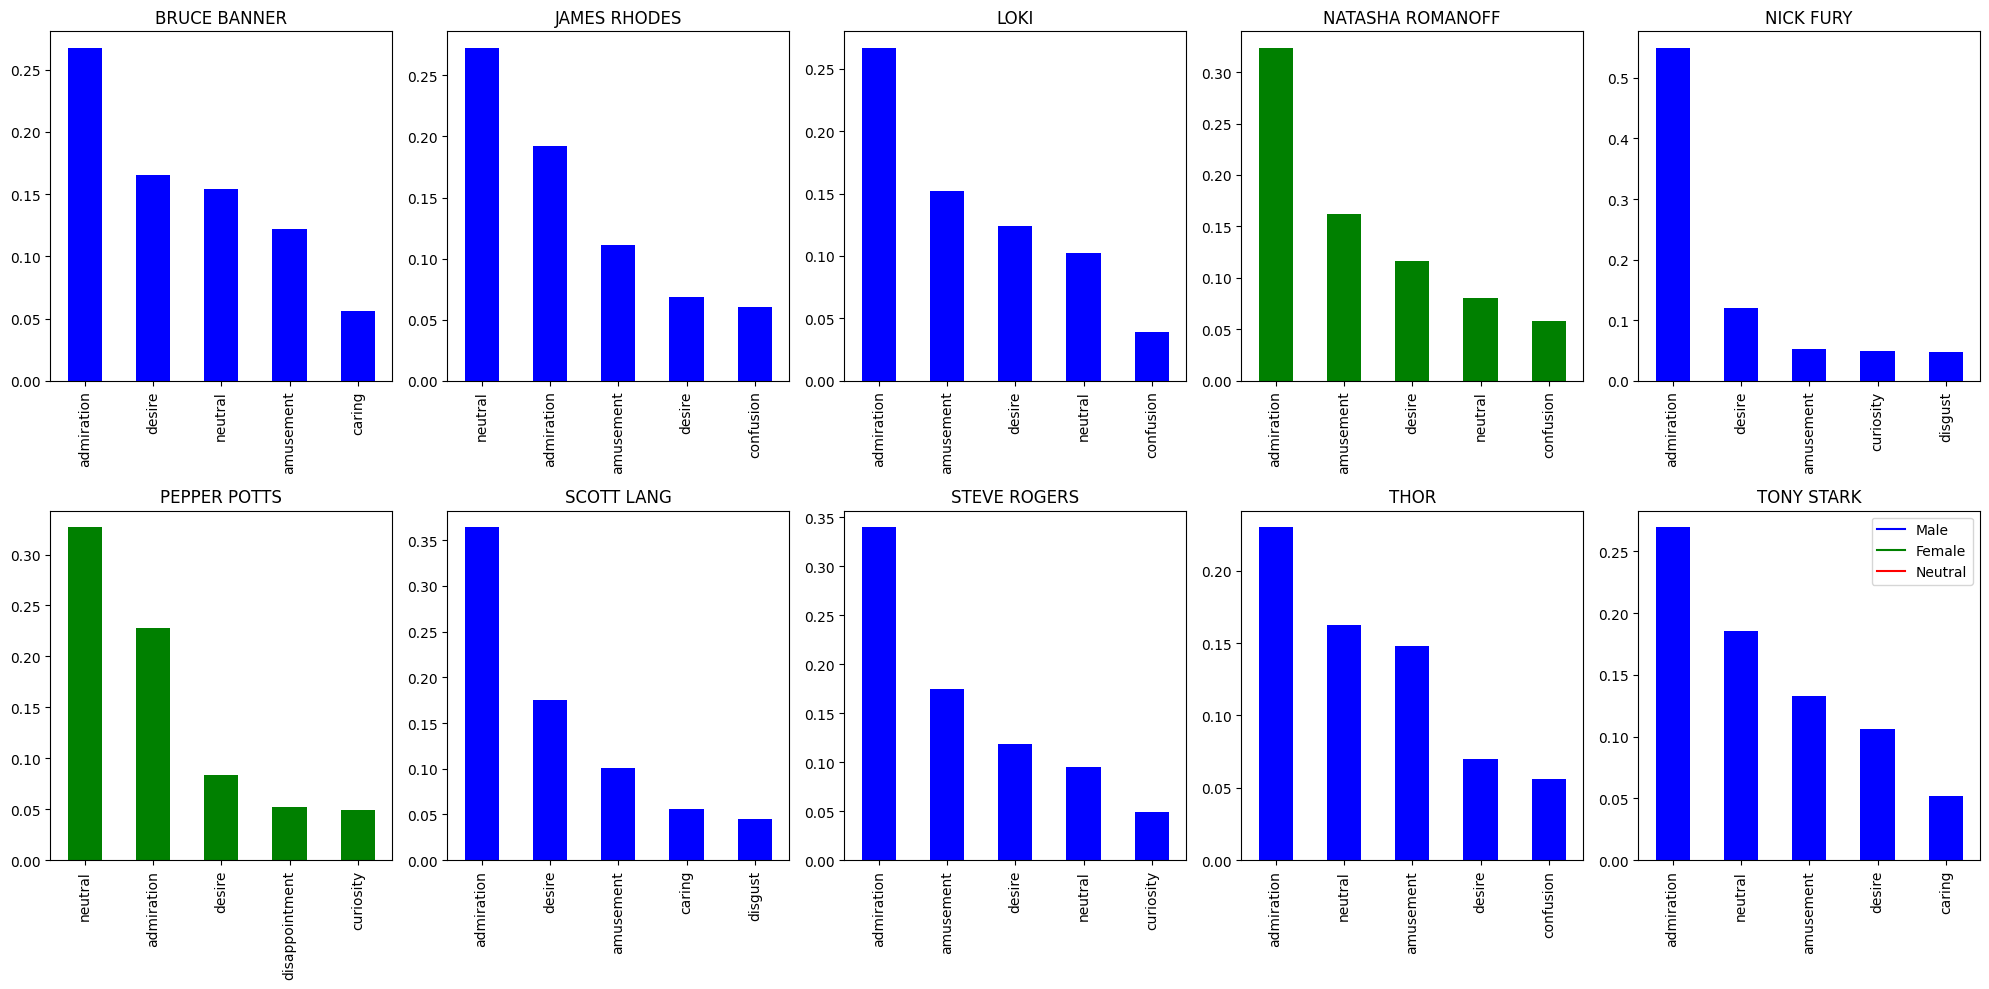

In [41]:
dataframes = []
# Load data for all movies
for i in os.listdir(folder_path):
    if i.endswith('.csv'):
        df = pd.read_csv(os.path.join(folder_path, i))
        dataframes.append(df)
# Merge all movies together
data = pd.concat(dataframes)
# Select the top 10 most occurring characters
top_characters = data['character'].value_counts().nlargest(10).index
data = data[data['character'].isin(top_characters)]
data = data.drop(columns=['line'])
# Group by 'character' and 'gender' and calculate the mean for each group
grouped_data = data.groupby(['character', 'gender']).agg('mean')
grouped_data = grouped_data.drop(columns=['Unnamed: 0'])
# Get the top 5 emotions for each character
top_emotions = grouped_data.apply(lambda x: x.nlargest(5).index, axis=1)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
colors = {'MALE': 'blue', 'FEMALE': 'green', 'NEUTRAL': 'red'}
# Plotting the top 5 emotions for each character
for ax, (character, gender) in zip(axes.flatten(), grouped_data.index):
    grouped_data.loc[(character, gender), top_emotions.loc[(character, gender)]].plot(kind='bar', ax=ax, title=f'{character}', color=colors[gender])
plt.tight_layout()
plt.legend([plt.Line2D((0,0),(1,1), color=color) for color in colors.values()], ['Male', 'Female', 'Neutral'])
plt.show()